## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats import zscore

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()


In [16]:
#Creating the function to clean with imputation based on year.

import math

def general_imputation_year(columns):
        
    """ Function: general_imputation based on a year
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = education['YEAR'].unique()
    
    for column_name in columns:

        new_column = column_name + '_c'
        education[new_column] = education[column_name]
        
        for year in years:
            
            m=education[education['YEAR']==year][[new_column,'YEAR']].mean()
            mean = m.astype('float')
            
            group = (education['YEAR']==year)
    
            if math.isnan(mean[0]):            
                mean_r = education[new_column].mean()

            else:
                mean_r = education[education['YEAR']==year][new_column].mean()
                
            education.loc[group,new_column] = education.loc[group,new_column].fillna(mean_r)

                
    return 'Imputation Done'

In [17]:
education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [18]:
#Cleaning columns with mean per year
general_imputation_year(['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])


'Imputation Done'

### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Text(0.5,1,'TOTAL EXPENDITURE')

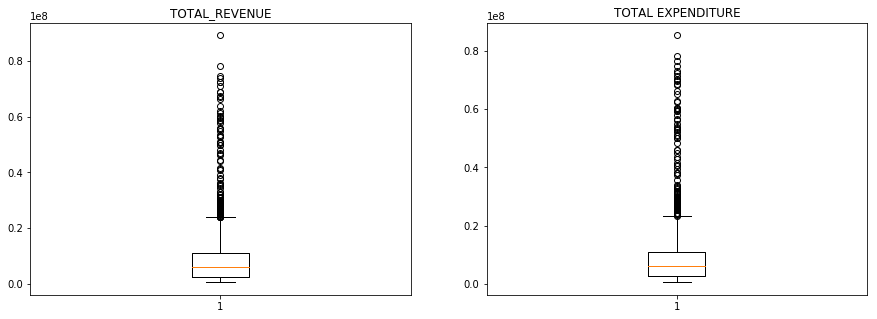

In [19]:
#Visualization technique

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education["TOTAL_REVENUE_c"])
plt.title("TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.boxplot(education['TOTAL_EXPENDITURE_c'])
plt.title('TOTAL EXPENDITURE')

In [20]:
#Z-SCORE technique to identify outliers

z_scores_revenue = zscore(education['TOTAL_REVENUE_c'])
print('Outliers - Total Revenue')
for threshold in range(1,5):
    print('Number of Outliers with threshold {} : {}'.format(threshold,len(np.where(z_scores_revenue > threshold)[0])))
    
z_scores_expenditure = zscore(education['TOTAL_EXPENDITURE_c'])
print('Outliers - Total Expenditure')
for threshold in range(1,5):
    print('Number of outliers with threshold {} : {}'.format(threshold,len(np.where(z_scores_expenditure > threshold)[0])))
    


Outliers - Total Revenue
Number of Outliers with threshold 1 : 138
Number of Outliers with threshold 2 : 57
Number of Outliers with threshold 3 : 39
Number of Outliers with threshold 4 : 28
Outliers - Total Expenditure
Number of outliers with threshold 1 : 140
Number of outliers with threshold 2 : 57
Number of outliers with threshold 3 : 41
Number of outliers with threshold 4 : 27


In [21]:
#Tukey or IQR (Interquartile Range) technique to identify outliers

q25,q75 = np.percentile(education['TOTAL_REVENUE_c'],[25,75])
iqr = q75 - q25

print('Outliers Total Revenue')
for threshold in np.arange(1,5,0.5):
    
    lim_min = q25 - (iqr * threshold)
    lim_max = q75 + (iqr * threshold)
    print('Number of outliers with threshold {} : {}'.format(threshold,len(np.where((education['TOTAL_REVENUE_c'] > lim_max) | (education['TOTAL_REVENUE_c'] < lim_min))[0])))
    
    
qq25,qq75 = np.percentile(education['TOTAL_EXPENDITURE_c'],[25,75])    
print('Outliers Total Expenditure')
for threshold in np.arange(1,5,0.5):
    
    lim_min = q25 - (iqr * threshold)
    lim_max = q75 + (iqr * threshold)
    print('Number of outliers with threshold {} : {}'.format(threshold,len(np.where((education['TOTAL_EXPENDITURE_c'] > lim_max) | (education['TOTAL_EXPENDITURE_c'] < lim_min))[0])))




Outliers Total Revenue
Number of outliers with threshold 1.0 : 143
Number of outliers with threshold 1.5 : 109
Number of outliers with threshold 2.0 : 74
Number of outliers with threshold 2.5 : 52
Number of outliers with threshold 3.0 : 45
Number of outliers with threshold 3.5 : 41
Number of outliers with threshold 4.0 : 37
Number of outliers with threshold 4.5 : 33
Outliers Total Expenditure
Number of outliers with threshold 1.0 : 150
Number of outliers with threshold 1.5 : 109
Number of outliers with threshold 2.0 : 77
Number of outliers with threshold 2.5 : 54
Number of outliers with threshold 3.0 : 49
Number of outliers with threshold 3.5 : 42
Number of outliers with threshold 4.0 : 38
Number of outliers with threshold 4.5 : 35


### 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

Text(0.5,1,'TOTAL EXPENDITURE - LOG TRANSFORMATION')

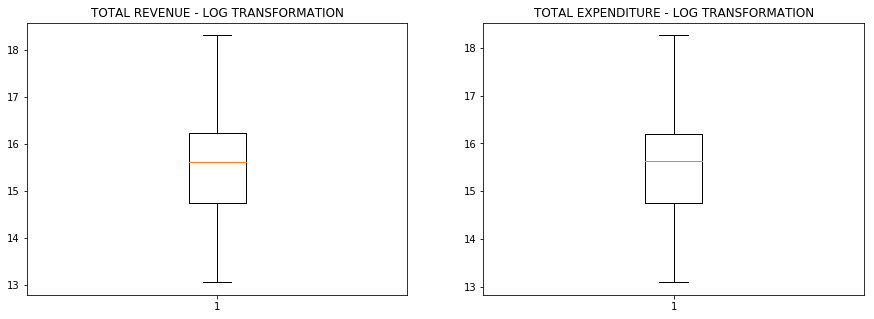

In [22]:
#Log transformation

education['TOTAL_REVENUE_log'] = np.log(education['TOTAL_REVENUE_c'])
education['TOTAL_EXPENDITURE_log'] = np.log(education['TOTAL_EXPENDITURE_c'])

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education['TOTAL_REVENUE_log'])
plt.title('TOTAL REVENUE - LOG TRANSFORMATION')

plt.subplot(1,2,2)
plt.boxplot(education['TOTAL_EXPENDITURE_log'])
plt.title('TOTAL EXPENDITURE - LOG TRANSFORMATION')


Text(0.5,1,'TOTAL EXPENDITURE - WINSORIZATION TRANSFORMATION')

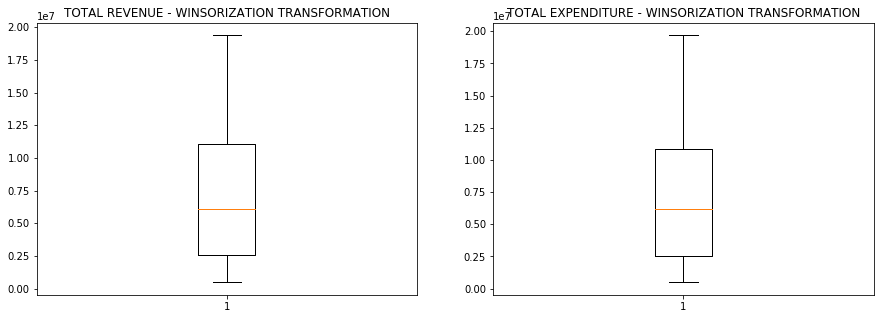

In [23]:
#Winsorization

from scipy.stats.mstats import winsorize

winsorized_views_r = winsorize(education['TOTAL_REVENUE_c'],(0,0.10))
winsorized_views_e = winsorize(education['TOTAL_EXPENDITURE_c'],(0,0.10))

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_views_r)
plt.title('TOTAL REVENUE - WINSORIZATION TRANSFORMATION')

plt.subplot(1,2,2)
plt.boxplot(winsorized_views_e)
plt.title('TOTAL EXPENDITURE - WINSORIZATION TRANSFORMATION')


### 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable

{'whiskers': [<matplotlib.lines.Line2D at 0x109ededd8>,
 'caps': [<matplotlib.lines.Line2D at 0x12b4e0b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x109ede908>],
 'medians': [<matplotlib.lines.Line2D at 0x12b4e33c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b4e37f0>],
 'means': []}

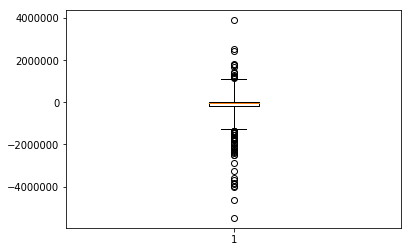

In [24]:
education['budget_deficit'] = education['TOTAL_REVENUE_c'] - education['TOTAL_EXPENDITURE_c']

plt.boxplot(education['budget_deficit'],whis=5)

{'whiskers': [<matplotlib.lines.Line2D at 0x12bdb47f0>,
 'caps': [<matplotlib.lines.Line2D at 0x12bdb4cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bdb4278>],
 'medians': [<matplotlib.lines.Line2D at 0x12bdbc8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12bdbccf8>],
 'means': []}

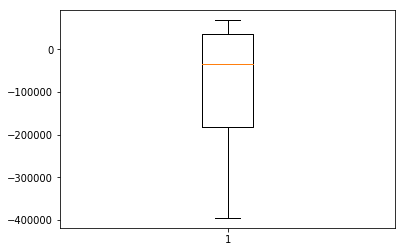

In [26]:
#Eliminating outliers with winsorization

education['winsorized_budget_deficit'] = winsorize(education['budget_deficit'],(0.10,0.20))
plt.boxplot(education['winsorized_budget_deficit'] )



### 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

{'whiskers': [<matplotlib.lines.Line2D at 0x12ad3b550>,
 'caps': [<matplotlib.lines.Line2D at 0x12ad3bda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ad32f98>],
 'medians': [<matplotlib.lines.Line2D at 0x12be08630>],
 'fliers': [<matplotlib.lines.Line2D at 0x12be08a58>],
 'means': []}

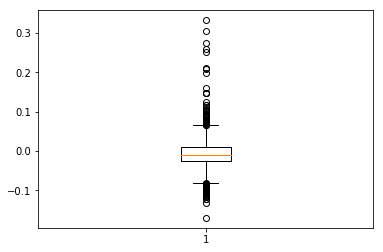

In [27]:
education['budget_deficit_log'] = education['TOTAL_REVENUE_log'] - education['TOTAL_EXPENDITURE_log']

plt.boxplot(education['budget_deficit_log'])


{'whiskers': [<matplotlib.lines.Line2D at 0x12bba9fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x12bbb4c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bba9e80>],
 'medians': [<matplotlib.lines.Line2D at 0x12bbbe518>],
 'fliers': [<matplotlib.lines.Line2D at 0x12bbbe940>],
 'means': []}

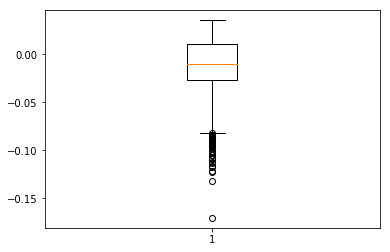

In [28]:
education['budget_deficit_log_wins']=winsorize(education['budget_deficit_log'],(0,0.10))
plt.boxplot(education['budget_deficit_log_wins'])

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [29]:
education[['budget_deficit','winsorized_budget_deficit','budget_deficit_log_wins']].describe()

,budget_deficit,winsorized_budget_deficit,budget_deficit_log_wins
count,1.492000e+03,1492.000000,1492.000000
mean,-1.063635e+05,-87799.422893,-0.010485
std,5.323402e+05,151348.691467,0.031438
min,-5.487742e+06,-395270.000000,-0.170369
25%,-1.809542e+05,-180954.250000,-0.026404
50%,-3.504650e+04,-35046.500000,-0.009703
75%,3.599975e+04,35999.750000,0.010570
max,3.897129e+06,68585.000000,0.035549


**Numbers are too different, I am not sure the selected technique was the correct one.**

### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?



**Method in 3erd question**